In [ ]:
# import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 

import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, TimeDistributed
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D,Activation

In [ ]:
pip install tensorflow_addons

In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
dataset_path = r'C:\Users\sriya\Downloads\Sneha'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']
IMG_SIZE = 192
IMAGE_SIZE = [192, 192]
DIM = (IMG_SIZE, IMG_SIZE)

# apply glob module to retrieve files/pathnames  

mri_path = os.path.join(dataset_path, CLASSES[1], '*')
mri_path = glob.glob(mri_path)

In [3]:
# #Performing Image Augmentation to have more data samples

# ZOOM = [.99, 1.01]
# BRIGHT_RANGE = [0.8, 1.2]
# HORZ_FLIP = True
# FILL_MODE = "constant"
# DATA_FORMAT = "channels_last"

# work_dr = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

# train_data_gen = work_dr.flow_from_directory(directory=dataset_path, target_size=DIM, batch_size=6500, shuffle=False)

In [3]:
work_dr = IDG(rescale = 1./255)
train_data_gen = work_dr.flow_from_directory(directory=dataset_path, target_size=DIM, batch_size=6500, shuffle=False)

Found 6400 images belonging to 4 classes.


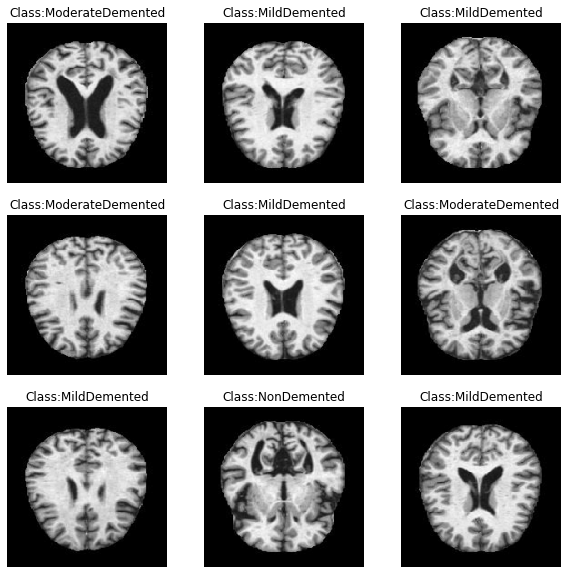

In [4]:
def show_images(generator,y_pred=None):
    """
    Input: An image generator,predicted labels (optional)
    Output: Displays a grid of 9 images with lables
    """
    
    # get image lables
    labels =dict(zip([0,1,2,3], CLASSES))
    
    # get a batch of images
    x,y = generator.next()
    
    # display a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, 6400)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))
                                                     
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))
    
# Display Train Images
show_images(train_data_gen)

In [5]:

train_data, train_labels = train_data_gen.next()

In [6]:

print(train_data.shape, train_labels.shape)

(6400, 192, 192, 3) (6400, 4)


In [7]:
mri_path

['C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (44).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (45).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (46).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (47).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (48).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (49).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (50).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (51).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (52).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (53).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (54).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (55).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (56).jpg',
 'C:\\Users\\sriya\\Downloads\\Sneha\\VeryMildDemented\\26 (57).jpg',
 'C:\\Users\\sriya\\

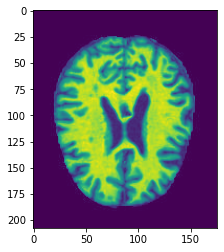

In [8]:
image = io.imread(mri_path[1])  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

In [9]:
# importing libraries
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import skimage.color as scc

C:\Users\sriya\AppData\Local\Temp/ipykernel_6868/2802754522.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray_image = scc.rgb2gray(image)


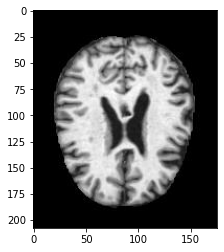

In [10]:
#normalization
gray_image = scc.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

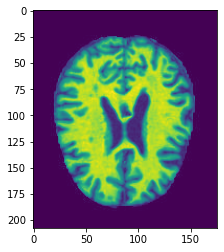

In [11]:

norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

In [12]:
#Splitting the data into train, test, and validation sets

train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.3, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [13]:
#Performing over-sampling of the data, since the classes are imbalanced

sm = SMOTE(random_state=42)

train_data1, train_labels1 = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

train_data2 = train_data1.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(train_data2.shape, train_labels1.shape)

(7212, 192, 192, 3) (7212, 4)


In [14]:
test_data1, test_labels1 = sm.fit_resample(test_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), test_labels)

test_data2 = test_data1.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(test_data2.shape, test_labels1.shape)

(3868, 192, 192, 3) (3868, 4)


In [15]:
# OVER SAMPLING
# - validation data
val_data1, val_labels1 = sm.fit_resample(val_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), val_labels)

val_data2 = val_data1.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(val_data2.shape, val_labels1.shape)

(1720, 192, 192, 3) (1720, 4)


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
base_model =  tf.keras.applications.DenseNet201(input_shape=(192,192,3), 
                   include_top=False,
                   weights="imagenet")

In [65]:
 from tensorflow.python.keras.layers import LSTM
from keras.layers import Bidirectional

In [66]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False

In [67]:
train_data1.shape

(7212, 110592)

In [68]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM,Input,GRU
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten, Input, Dropout




In [69]:
model = Sequential()
model.add(base_model)
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(MaxPool2D(pool_size=(1,1),strides=(2,2)))
model.add(TimeDistributed(Bidirectional(LSTM(64,return_sequences=True))))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(MaxPool2D(pool_size=(1,1),strides=(2,2)))
model.add(TimeDistributed(Bidirectional(LSTM(64,return_sequences=True))))
model.add(Dropout(0.5))
model.add(TimeDistributed(LSTM(32, return_sequences=True)))
model.add(Flatten()) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=4, activation="softmax"))

In [70]:
#Defining a custom callback function to stop training our model when accuracy goes above 99%

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') >= 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

#EarlyStopping callback to make sure model is always learning
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [71]:
#Defining other parameters for our CNN model

model = model

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='Accuracy'),
           tf.keras.metrics.AUC(name='AUC'),
           tfa.metrics.F1Score(num_classes=4)]

# CALLBACKS = [my_callback]


model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 6, 6, 1920)        18321984  
                                                                 
 conv2d_309 (Conv2D)         (None, 6, 6, 64)          1105984   
                                                                 
 batch_normalization_309 (Ba  (None, 6, 6, 64)         256       
 tchNormalization)                                               
                                                                 
 activation_305 (Activation)  (None, 6, 6, 64)         0         
                                                                 
 dropout_16 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                 

In [72]:
EPOCHS = 35


history = model.fit(train_data2, train_labels1, validation_data=(val_data2, val_labels1),batch_size=50,epochs=EPOCHS)

Epoch 1/35
145/145 [==============================] - 586s 4s/step - loss: 1.0693 - Accuracy: 0.4605 - AUC: 0.7616 - f1_score: 0.4380 - val_loss: 0.8227 - val_Accuracy: 0.5884 - val_AUC: 0.8699 - val_f1_score: 0.5665
Epoch 2/35
145/145 [==============================] - 568s 4s/step - loss: 0.7159 - Accuracy: 0.6579 - AUC: 0.9012 - f1_score: 0.6440 - val_loss: 0.9180 - val_Accuracy: 0.6215 - val_AUC: 0.8647 - val_f1_score: 0.6086
Epoch 3/35
145/145 [==============================] - 538s 4s/step - loss: 0.6336 - Accuracy: 0.6995 - AUC: 0.9235 - f1_score: 0.6930 - val_loss: 0.9162 - val_Accuracy: 0.6116 - val_AUC: 0.8681 - val_f1_score: 0.6123
Epoch 4/35
145/145 [==============================] - 528s 4s/step - loss: 0.5915 - Accuracy: 0.7263 - AUC: 0.9341 - f1_score: 0.7248 - val_loss: 1.1493 - val_Accuracy: 0.5564 - val_AUC: 0.8288 - val_f1_score: 0.5470
Epoch 5/35
145/145 [==============================] - 530s 4s/step - loss: 0.5342 - Accuracy: 0.7590 - AUC: 0.9462 - f1_score: 0.757

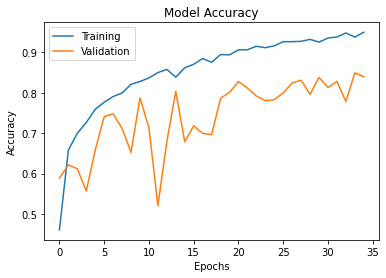

In [74]:
fig, ax = plt.subplots()
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
fig.savefig('Model Accuracy_MobileNet.png', format='png', dpi=300)

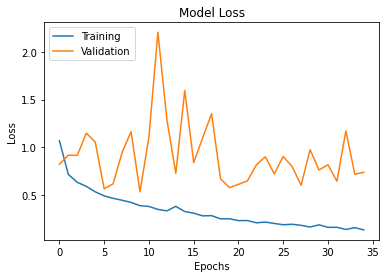

In [75]:
fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
fig.savefig('Model Loss_MobileNet.png', format='png', dpi=300)

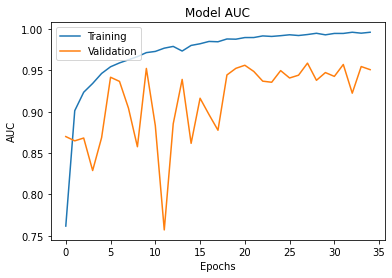

In [76]:
fig, ax = plt.subplots()
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
fig.savefig('Model AUC_MobileNet.png', format='png', dpi=300)

In [73]:
train_scores = model.evaluate(train_data, train_labels)
val_scores = model.evaluate(val_data, val_labels)
test_scores = model.evaluate(test_data,test_labels)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

60/60 [==============================] - 123s 2s/step - loss: 0.7550 - Accuracy: 0.7839 - AUC: 0.9387 - f1_score: 0.8033
Training Accuracy: 91.80%
Validation Accuracy: 78.68%
Testing Accuracy: 78.39%


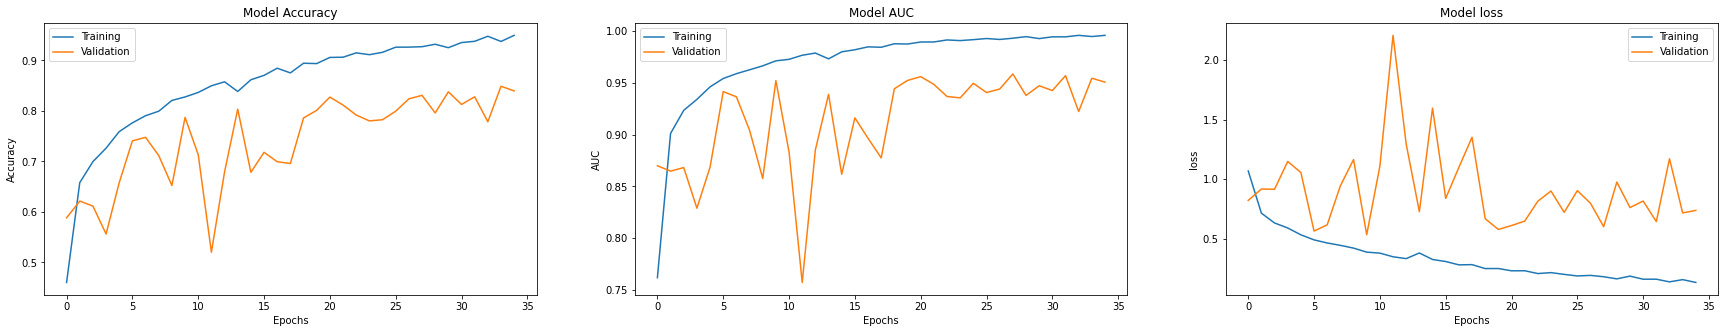

In [77]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["Accuracy", "AUC", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["Training", "Validation"])
    fig.savefig('MobileNet.png', format='png', dpi=300)
    



In [78]:
pred_labels = model.predict(test_data)

In [79]:
from sklearn import metrics
auc = metrics.roc_auc_score(test_labels,pred_labels,multi_class='ovo')
auc

0.9357572992314076

In [80]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)
conf_arr

array([[256,   0,   6,  21],
       [  0,  14,   0,   1],
       [ 61,   2, 749, 155],
       [ 92,   0,  77, 486]], dtype=int64)

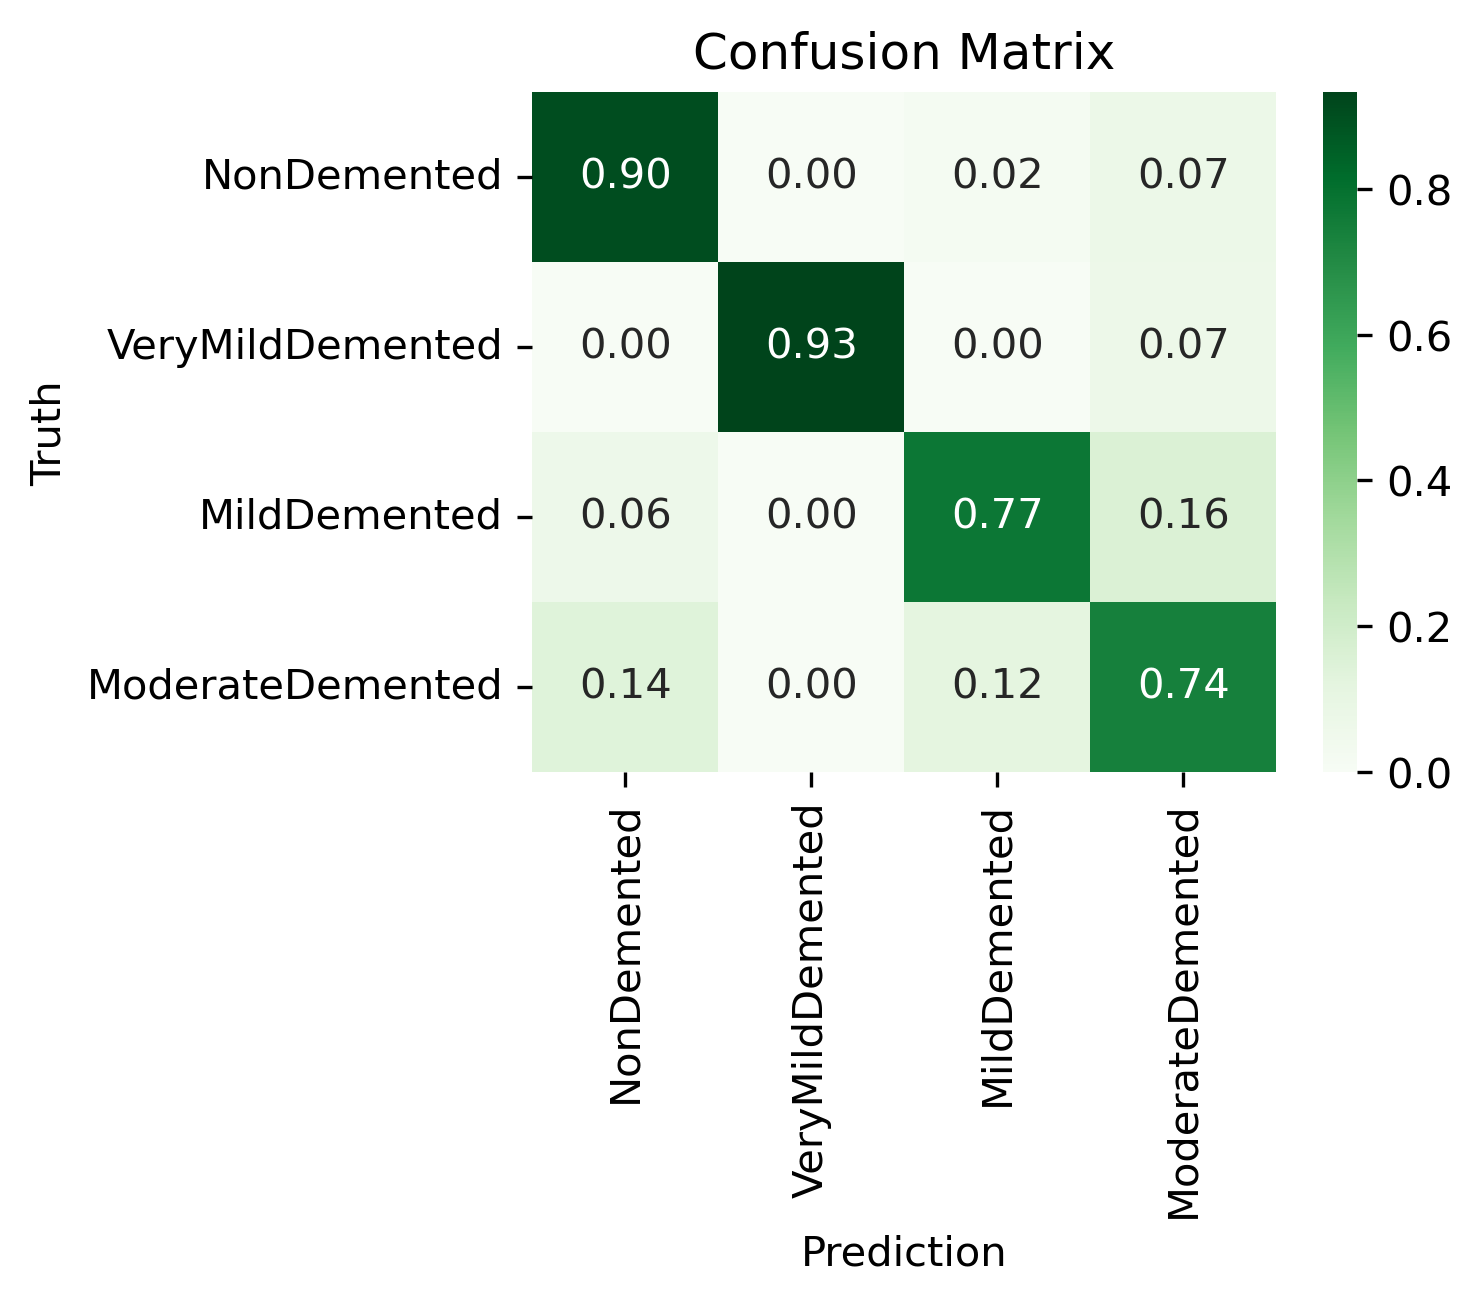

In [81]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)
cmn = conf_arr.astype('float') / conf_arr.sum(axis=1)[:, np.newaxis]
fig=plt.figure(figsize=(4,3), dpi=300, facecolor='w', edgecolor='k')

ax = sns.heatmap(cmn, cmap='Greens', annot=True, fmt=".2f", xticklabels= CLASSES,
                yticklabels=CLASSES)

plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)
ax.figure.savefig('confmatrix_MobileNet.png', format='png', dpi=300)

In [82]:
pred_labels1=np.argmax(pred_labels,axis=1)
test_labels1=np.argmax(test_labels,axis=1)

In [83]:
predlabels_new=label_binarize(pred_labels1,classes=np.unique(pred_labels1))
classes=np.unique(pred_labels1)

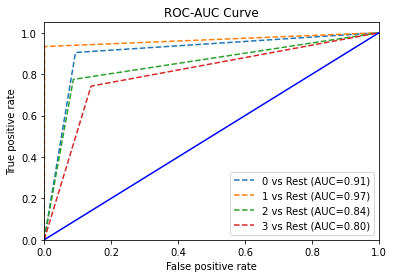

In [84]:
fig, ax = plt.subplots()
f_p_r=dict()
t_p_r = dict()
thres=dict()
rocauc_curve= dict()
total_no_of_class = classes.shape[0]
for i in range(total_no_of_class):    
    f_p_r[i], t_p_r[i], thres[i] = metrics.roc_curve(test_labels[:,i],predlabels_new[:,i])
    rocauc_curve[i] = metrics.auc(f_p_r[i], t_p_r[i])    
    plt.plot(f_p_r[i], t_p_r[i], linestyle='--',label='%s vs Rest (AUC=%0.2f)'%(classes[i],rocauc_curve[i]))

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC-AUC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('ROCAUC_MobileNet.png', format='png', dpi=300)

In [85]:
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)
print(classification_report(test_labels, pred_labels, target_names=CLASSES))

                  precision    recall  f1-score   support

     NonDemented       0.63      0.90      0.74       283
VeryMildDemented       0.88      0.93      0.90        15
    MildDemented       0.90      0.77      0.83       967
ModerateDemented       0.73      0.74      0.74       655

       micro avg       0.78      0.78      0.78      1920
       macro avg       0.78      0.84      0.80      1920
    weighted avg       0.80      0.78      0.79      1920
     samples avg       0.78      0.78      0.78      1920



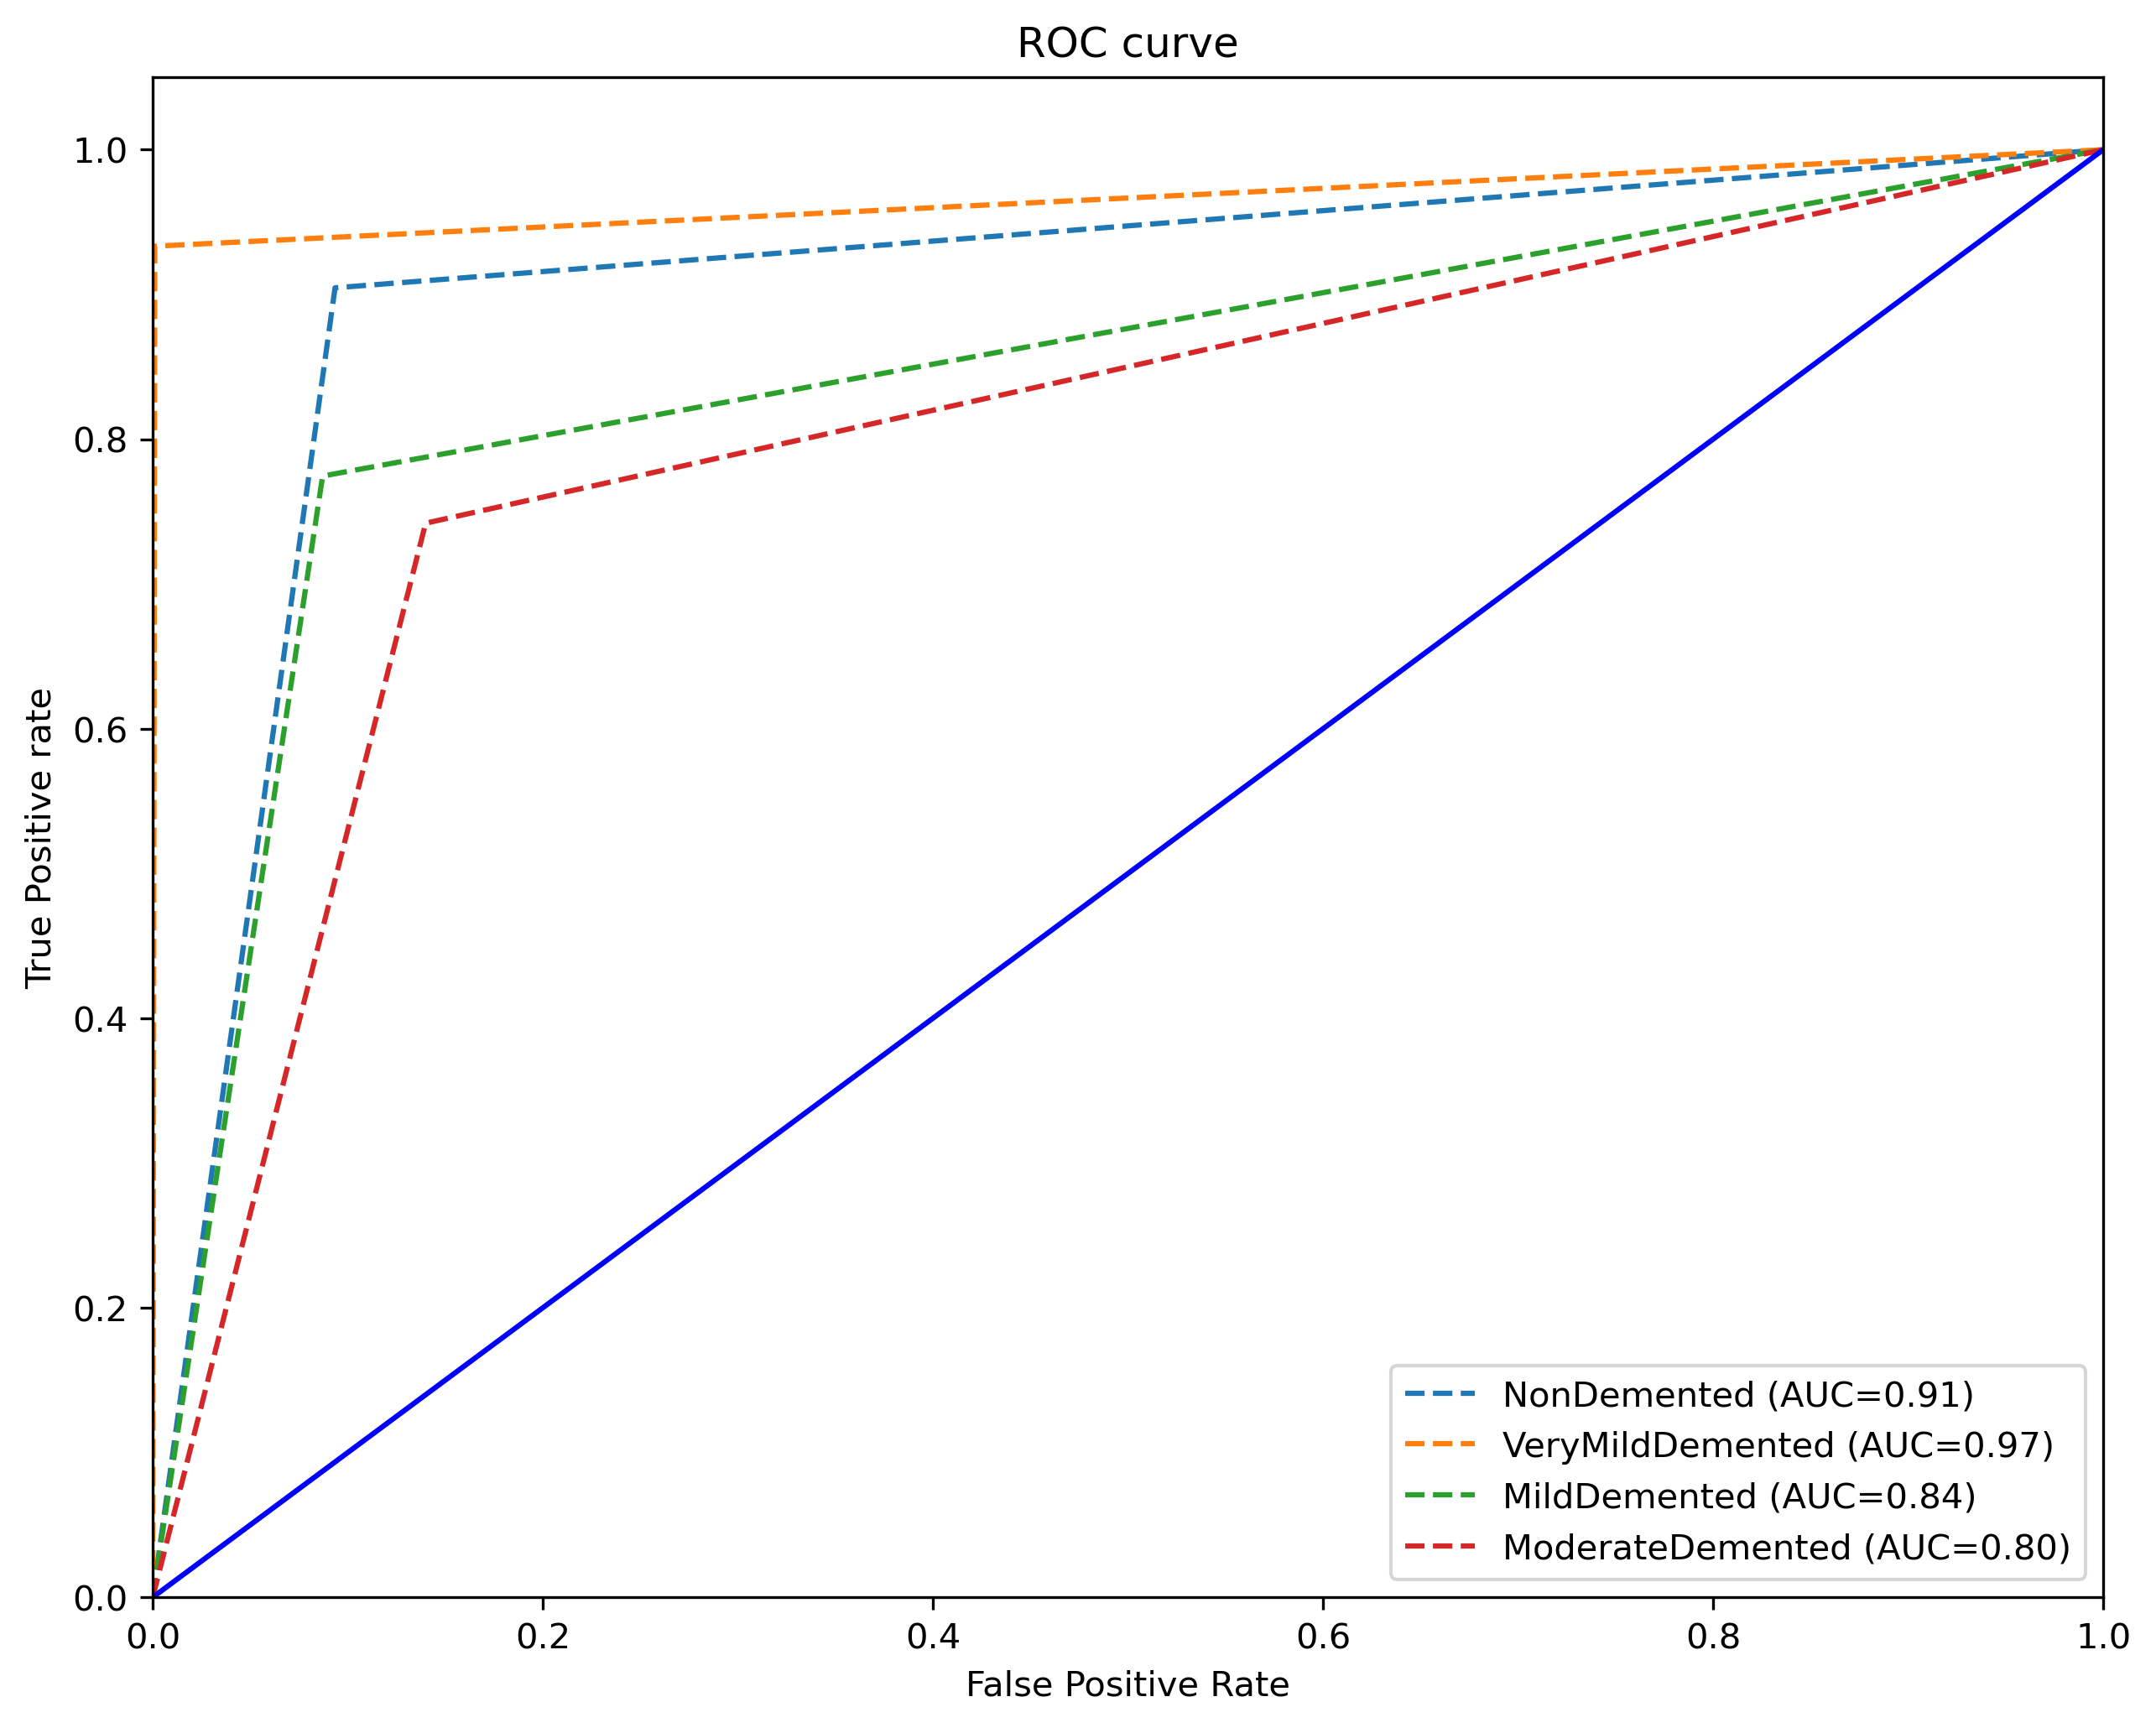

In [86]:
fpr = dict()
tpr = dict()
thresh =dict()
roc_auc = dict()

n_class = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
for i, in zip(range(n_class)):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(test_labels[:,i],predlabels_new[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    if classes[i]==0:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='NonDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==1:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='VeryMildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==2:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='MildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==3:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='ModerateDemented (AUC=%0.2f)'%(roc_auc[i]))
plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('myfig_MobileNet.png',dpi=300)


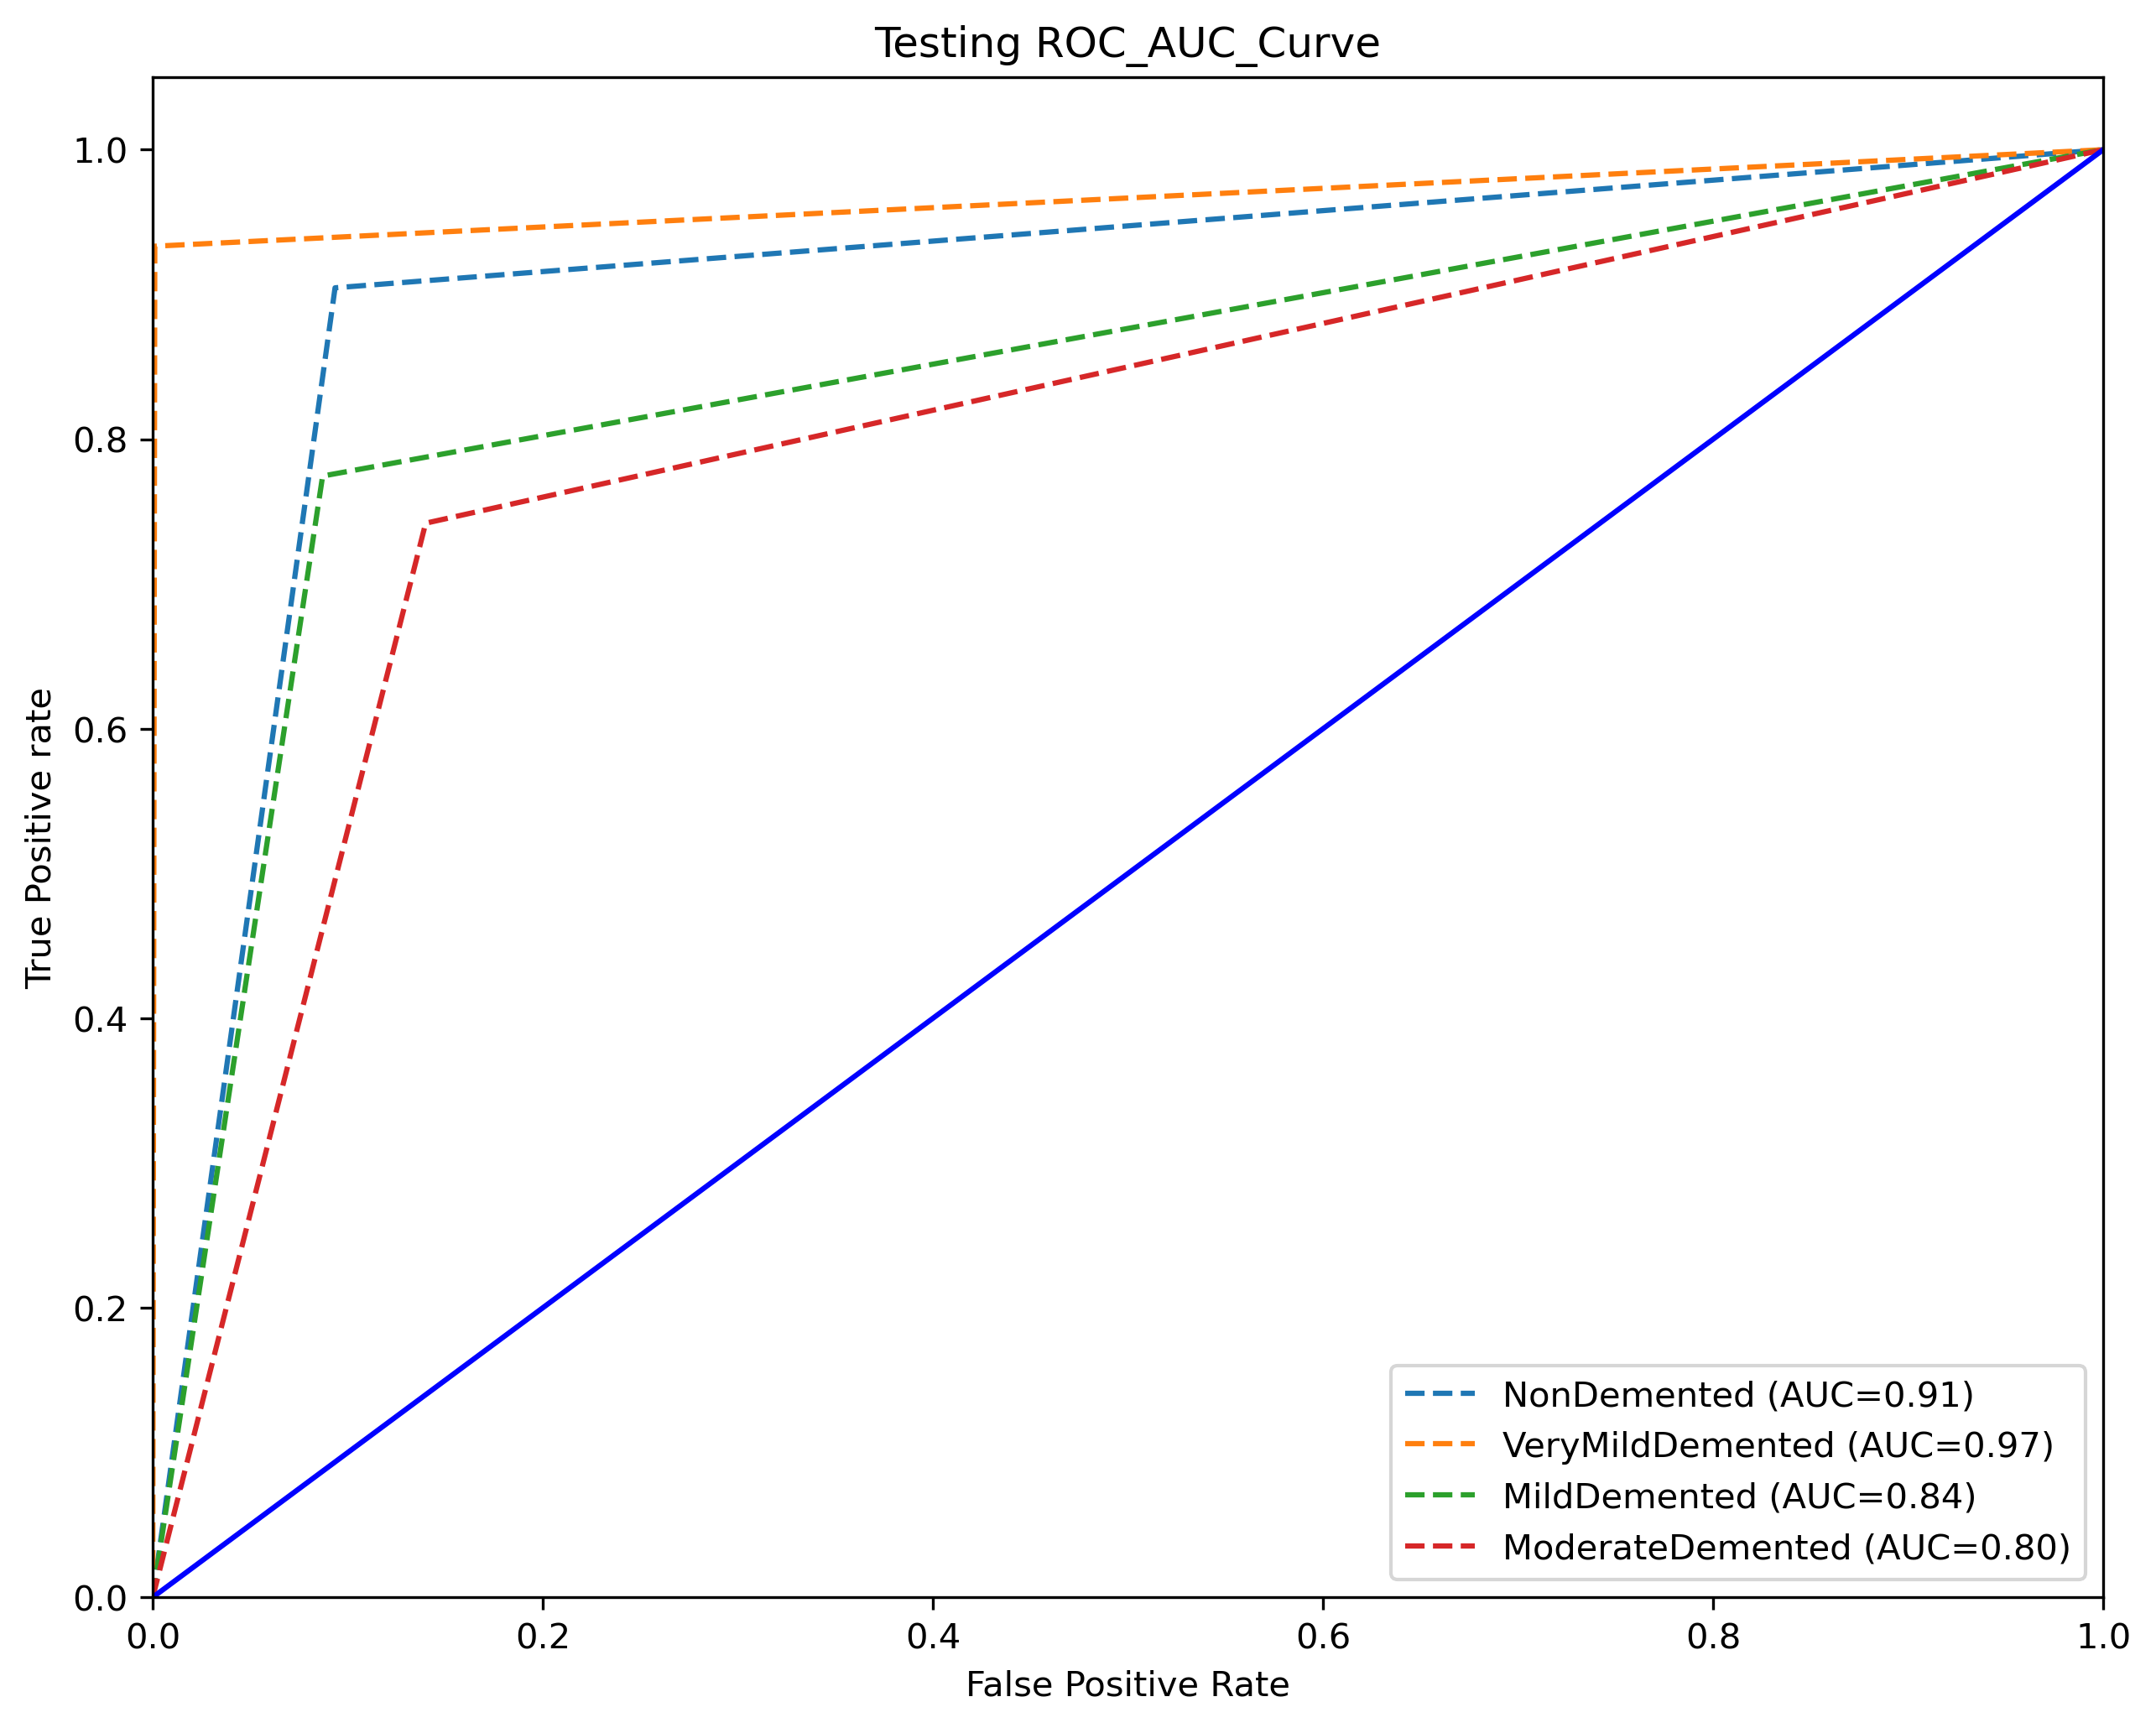

In [87]:
# roc curve for classes
fpr = dict()
tpr = dict()
thresh =dict()
roc_auc = dict()

n_class = classes.shape[0]

fig=plt.figure(figsize=(10, 8), dpi=300)
for i in zip(range(n_class)):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(test_labels[:,i],pred_labels[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    if classes[i]==0:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='NonDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==1:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='VeryMildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==2:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='MildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==3:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='ModerateDemented (AUC=%0.2f)'%(roc_auc[i]))
plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Testing ROC_AUC_Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('brain mri testing roc auc_MobileNet.png',dpi=300)# roc curve for classes


In [88]:
pred_labels_train = model.predict(train_data)

In [89]:
pred_labels_val = model.predict(val_data)

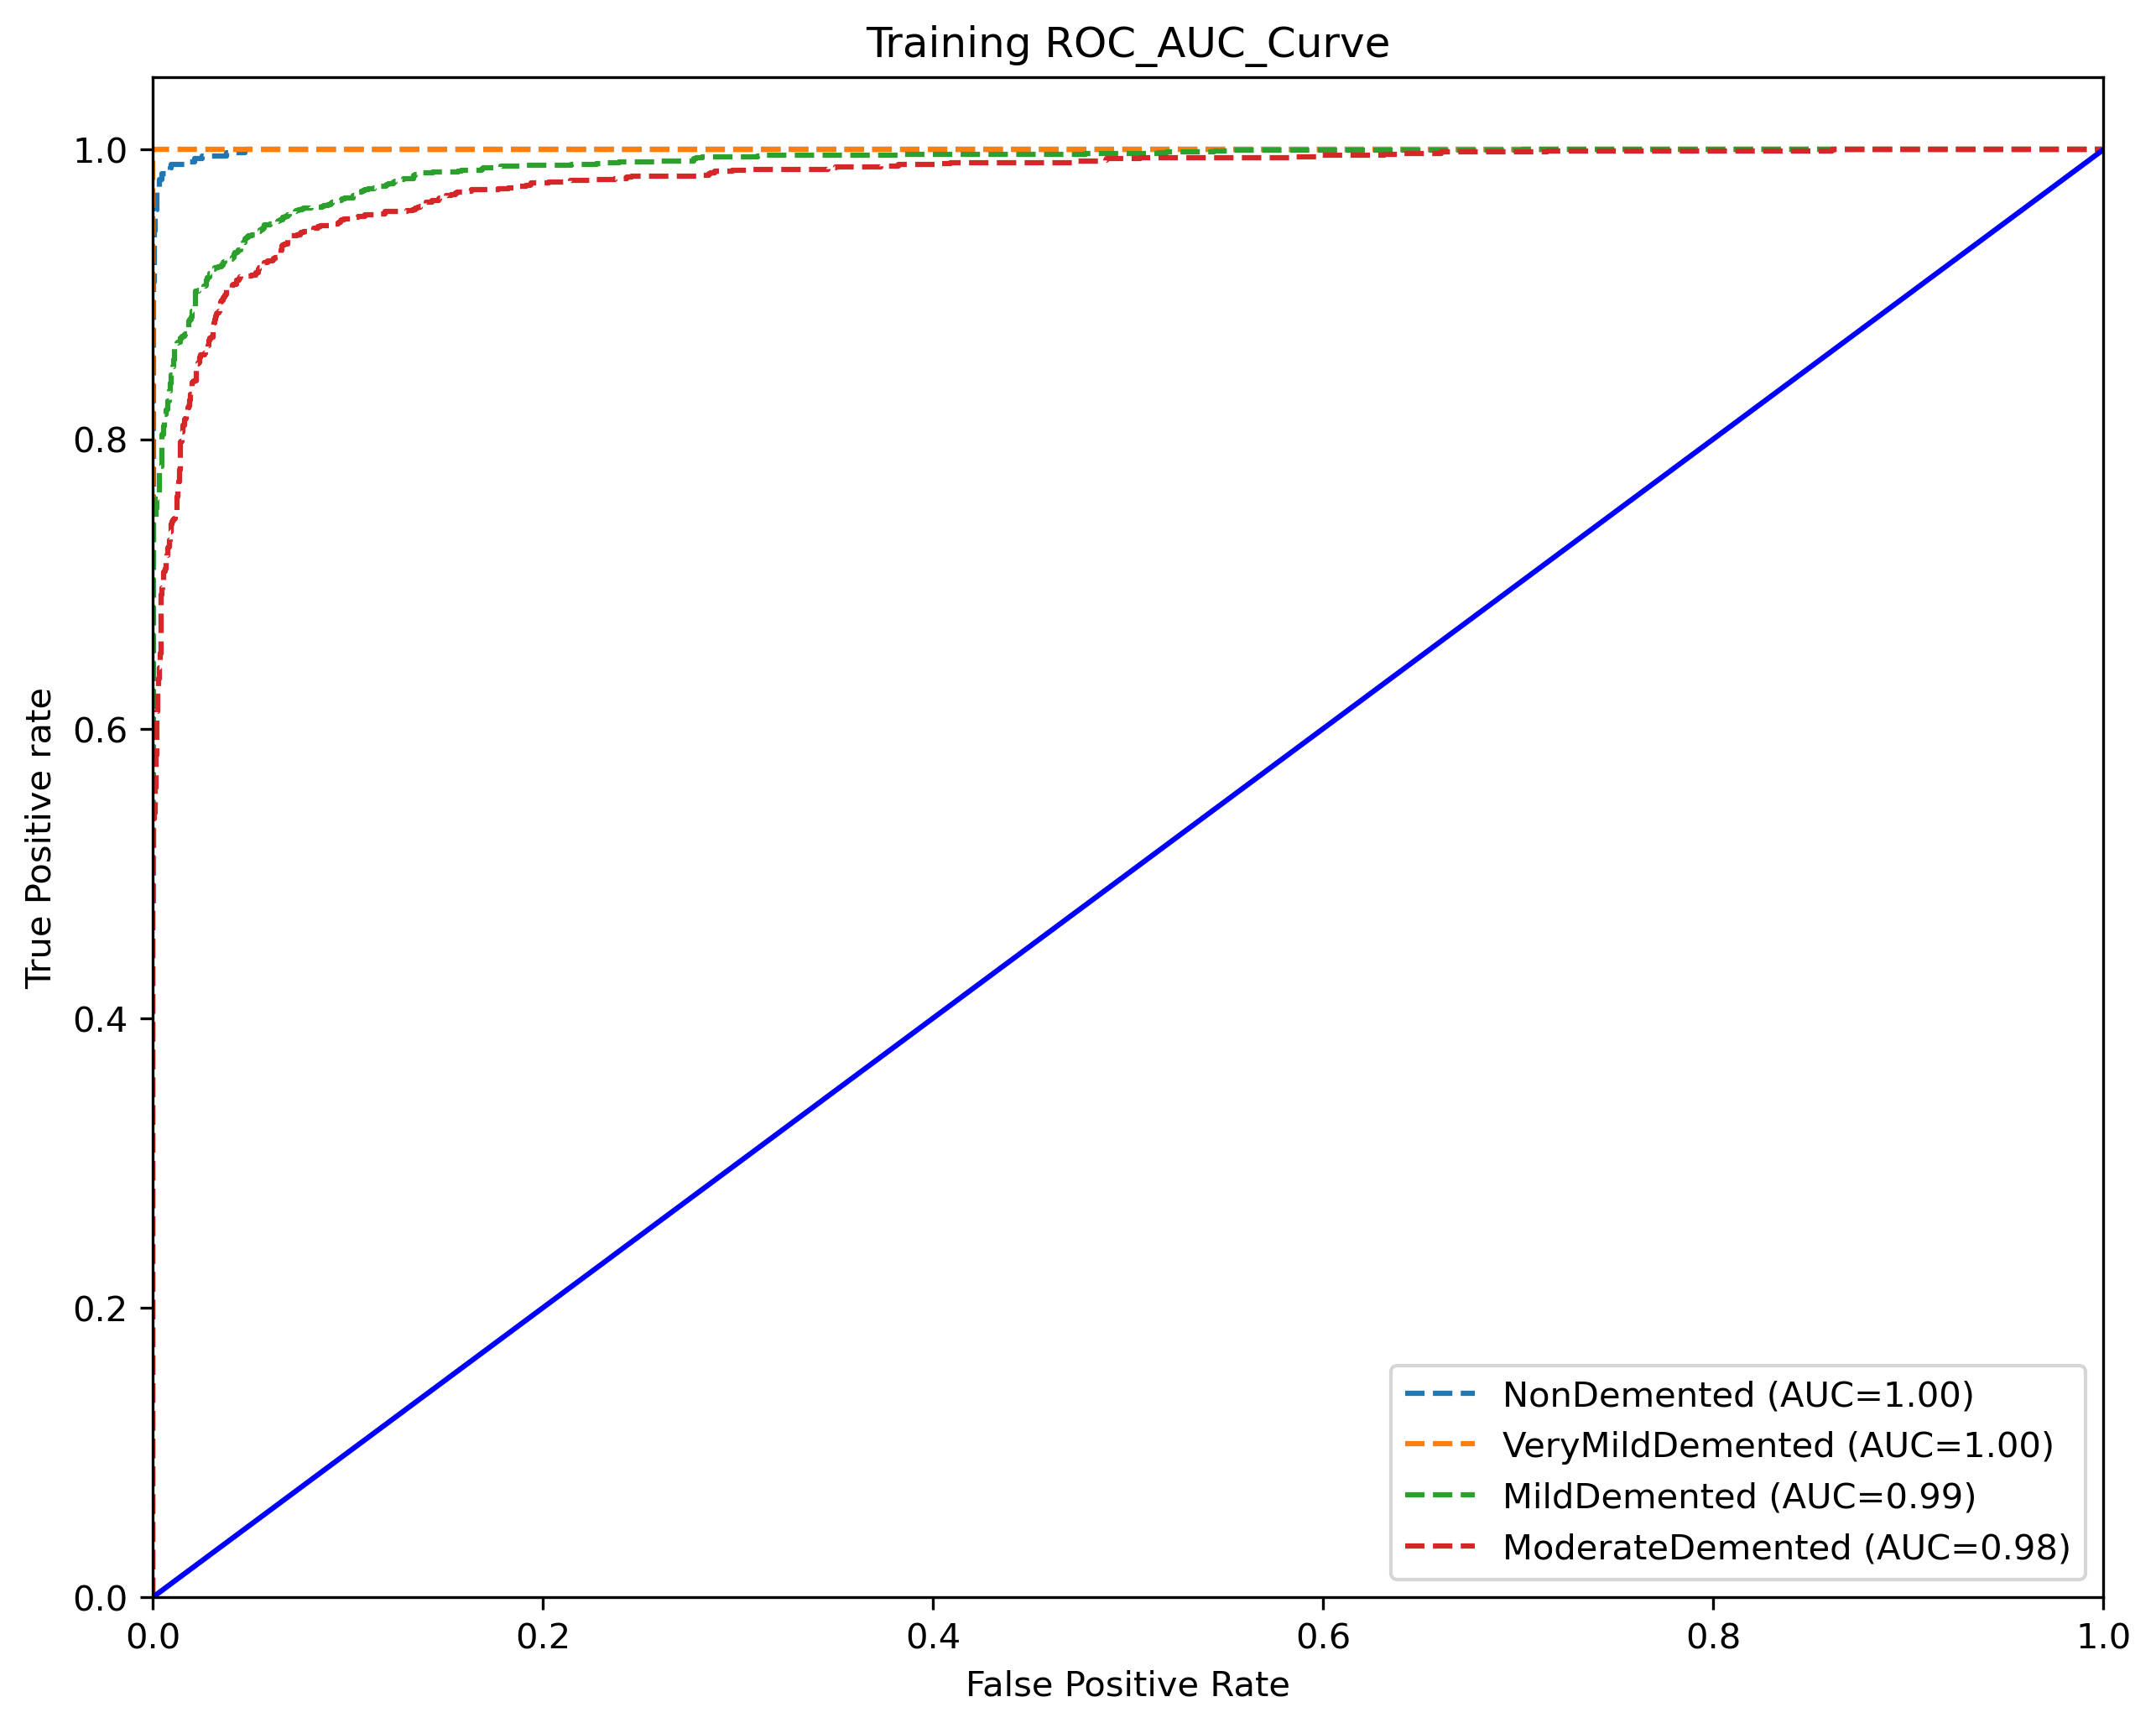

In [90]:
# roc curve for classes
fpr = dict()
tpr = dict()
thresh =dict()
roc_auc = dict()

n_class = classes.shape[0]

fig=plt.figure(figsize=(10, 8), dpi=300)
for i in zip(range(n_class)):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(train_labels[:,i],pred_labels_train[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    if classes[i]==0:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='NonDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==1:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='VeryMildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==2:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='MildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==3:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='ModerateDemented (AUC=%0.2f)'%(roc_auc[i]))
plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Training ROC_AUC_Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('roc auc_train_MobileNet.png',dpi=300)# roc curve for classes


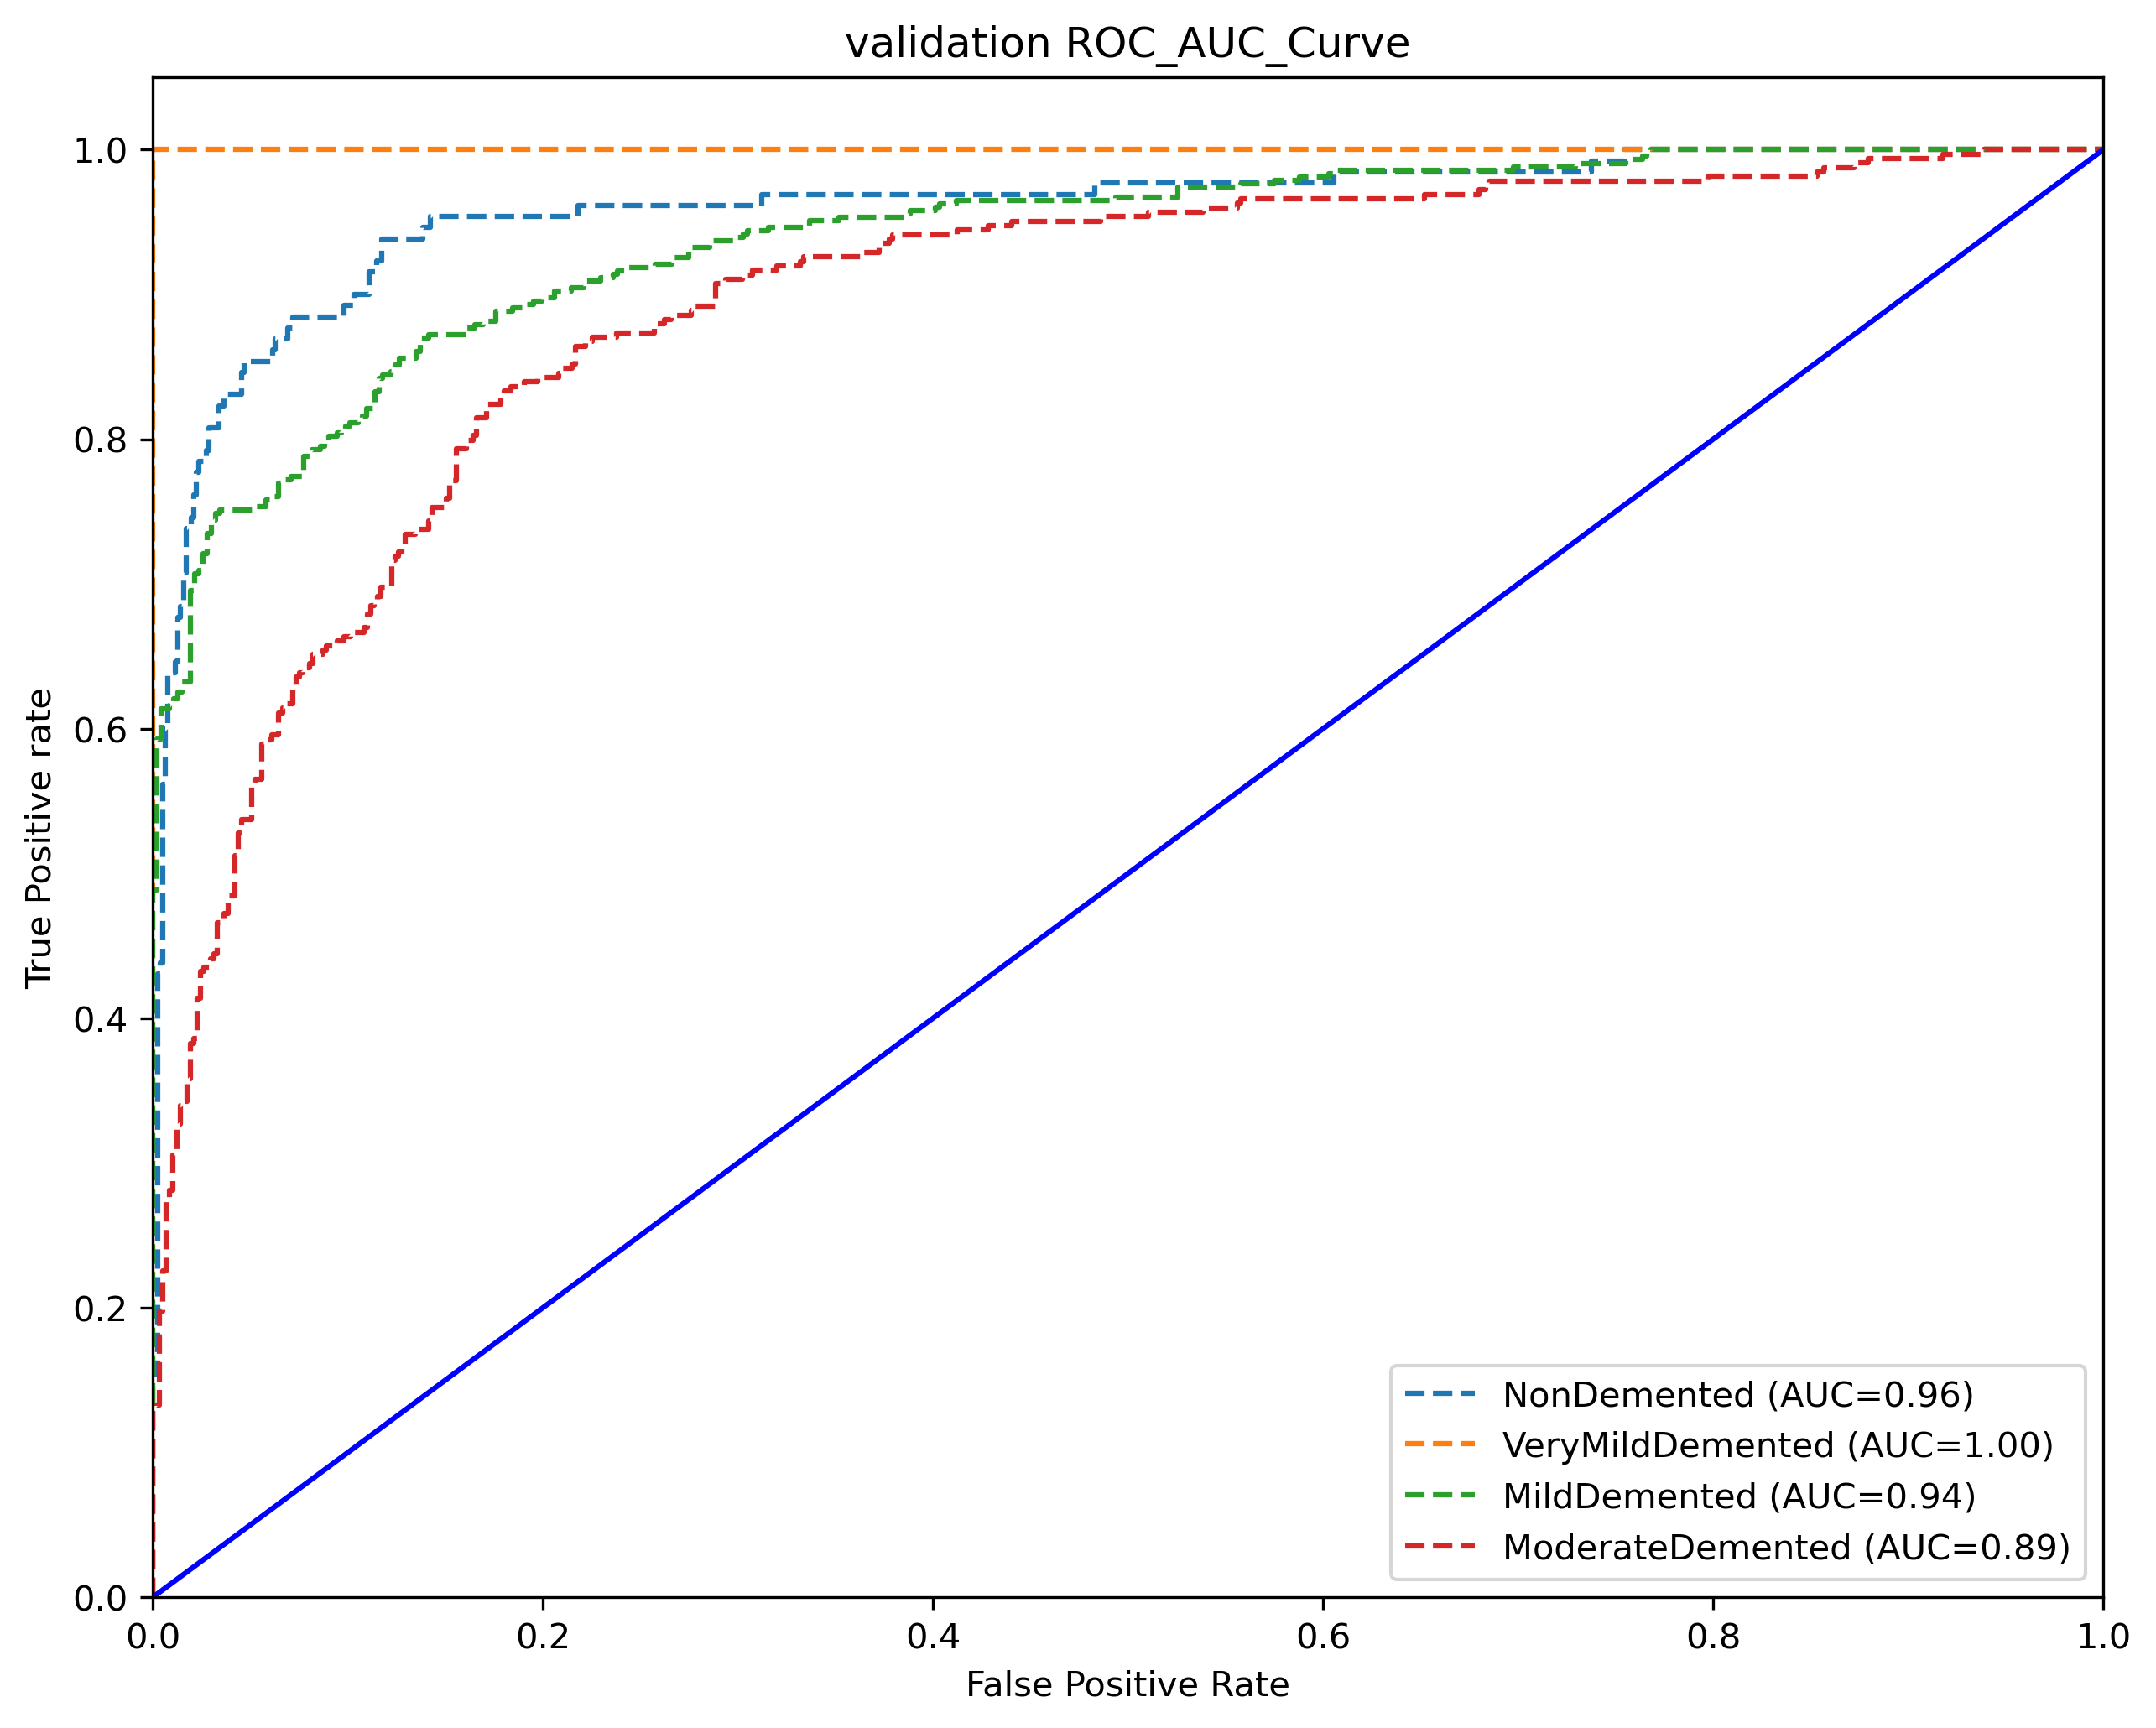

In [91]:
# roc curve for classes
fpr = dict()
tpr = dict()
thresh =dict()
roc_auc = dict()

n_class = classes.shape[0]

fig=plt.figure(figsize=(10, 8), dpi=300)
for i in zip(range(n_class)):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(val_labels[:,i],pred_labels_val[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    if classes[i]==0:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='NonDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==1:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='VeryMildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==2:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='MildDemented (AUC=%0.2f)'%(roc_auc[i]))
    if classes[i]==3:
        plt.plot(fpr[i], tpr[i], linestyle='--',label='ModerateDemented (AUC=%0.2f)'%(roc_auc[i]))
plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('validation ROC_AUC_Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('roc auc_validation_MobileNet.png',dpi=300)# roc curve for classes
